In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('results.csv')
data.head()

,pdf_path,questions_file,output_file,llm_model,embedding_model,chunk_size,chunk_overlap,bm25_k,vector_k,ensemble_weights,reranker_model,reranker_top_n,timestamp,avg_bleu,reference_accuracy,num_questions_evaluated,avg_rouge1_recall,avg_rouge2_recall,run_id
0,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,xiaobu-embedding-v2,300,100,7,7,"[0.6, 0.4]",bge-reranker-base,4,20250605_162036,0.4812,0.7160,81,0.8481,0.7082,20250605_162036
1,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,m3e-base,300,100,7,7,"[0.6, 0.4]",bge-reranker-v2-m3,4,20250605_164301,0.4548,0.7037,81,0.8713,0.7319,20250605_164301
2,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,xiaobu-embedding-v2,300,100,3,3,"[0.5, 0.5]",bge-reranker-base,3,20250605_184517,0.4631,0.7654,81,0.8201,0.6837,20250605_184517
3,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,xiaobu-embedding-v2,300,100,3,5,"[0.5, 0.5]",bge-reranker-base,3,20250605_185258,0.4725,0.7778,81,0.8318,0.7006,20250605_185258
4,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,xiaobu-embedding-v2,300,100,5,3,"[0.5, 0.5]",bge-reranker-base,3,20250605_190031,0.4502,0.7654,81,0.8184,0.6769,20250605_190031


In [4]:
# Convert 'timestamp' to datetime objects for easy comparison
data['timestamp_dt'] = pd.to_datetime(data['timestamp'], format='%Y%m%d_%H%M%S')

In [5]:
data.head()

,pdf_path,questions_file,output_file,llm_model,embedding_model,chunk_size,chunk_overlap,bm25_k,vector_k,ensemble_weights,reranker_model,reranker_top_n,timestamp,avg_bleu,reference_accuracy,num_questions_evaluated,avg_rouge1_recall,avg_rouge2_recall,run_id,timestamp_dt
0,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,xiaobu-embedding-v2,300,100,7,7,"[0.6, 0.4]",bge-reranker-base,4,20250605_162036,0.4812,0.7160,81,0.8481,0.7082,20250605_162036,2025-06-05 16:20:36
1,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,m3e-base,300,100,7,7,"[0.6, 0.4]",bge-reranker-v2-m3,4,20250605_164301,0.4548,0.7037,81,0.8713,0.7319,20250605_164301,2025-06-05 16:43:01
2,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,xiaobu-embedding-v2,300,100,3,3,"[0.5, 0.5]",bge-reranker-base,3,20250605_184517,0.4631,0.7654,81,0.8201,0.6837,20250605_184517,2025-06-05 18:45:17
3,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,xiaobu-embedding-v2,300,100,3,5,"[0.5, 0.5]",bge-reranker-base,3,20250605_185258,0.4725,0.7778,81,0.8318,0.7006,20250605_185258,2025-06-05 18:52:58
4,./汽车介绍手册.pdf,./QA_pairs.json,./answers_temp.json,c101-qwen25-72b,xiaobu-embedding-v2,300,100,5,3,"[0.5, 0.5]",bge-reranker-base,3,20250605_190031,0.4502,0.7654,81,0.8184,0.6769,20250605_190031,2025-06-05 19:00:31


In [6]:
# Define the cut-off date
cutoff_date = pd.to_datetime('20250608_000000', format='%Y%m%d_%H%M%S')

In [7]:
# Identify rows where timestamp is before June 8, 2025
incorrect_entries = data[data['timestamp_dt'] < cutoff_date].copy()

# Apply the correction
data.loc[data['timestamp_dt'] < cutoff_date, 'chunk_size'] = 300
data.loc[data['timestamp_dt'] < cutoff_date, 'chunk_overlap'] = 100

# Drop the temporary datetime column if not needed for further analysis
data = data.drop(columns=['timestamp_dt'])

In [8]:
# To replace the original CSV file, uncomment the following line:
data.to_csv('results.csv', index=False)

In [9]:
original_rows = data.shape[0]
data = data[data['embedding_model'] != 'Qwen3-Embedding-0.6B']
rows_removed = original_rows - data.shape[0]
print(f"\n已删除 {rows_removed} 行，其中 embedding_model 为 'Qwen3-Embedding-0.6B'。")


已删除 1 行，其中 embedding_model 为 'Qwen3-Embedding-0.6B'。


In [10]:
# 找出 'bm25_k' 等于 7 的所有行的索引
anomal_data_index = data[data['bm25_k'] == 7].index

# 删除这些行
data = data.drop(anomal_data_index)

len(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 2 to 362
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pdf_path                 360 non-null    object 
 1   questions_file           360 non-null    object 
 2   output_file              360 non-null    object 
 3   llm_model                360 non-null    object 
 4   embedding_model          360 non-null    object 
 5   chunk_size               360 non-null    int64  
 6   chunk_overlap            360 non-null    int64  
 7   bm25_k                   360 non-null    int64  
 8   vector_k                 360 non-null    int64  
 9   ensemble_weights         360 non-null    object 
 10  reranker_model           360 non-null    object 
 11  reranker_top_n           360 non-null    int64  
 12  timestamp                360 non-null    object 
 13  avg_bleu                 360 non-null    float64
 14  reference_accuracy       360 no

In [11]:
# Create a combined 'chunk_params' column
data['chunk_params'] = data.apply(lambda row: f"({int(row['chunk_size'])}, {int(row['chunk_overlap'])})", axis=1)


In [12]:
# Define the metrics to analyze
metrics = ['avg_bleu', 'reference_accuracy', 'avg_rouge1_recall', 'avg_rouge2_recall']

# Define the parameters to analyze
parameters = ['bm25_k', 'vector_k', 'reranker_model', 'reranker_top_n', 'chunk_params', 'embedding_model', 'ensemble_weights']

c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Figure size 1800x1200 with 0 Axes>

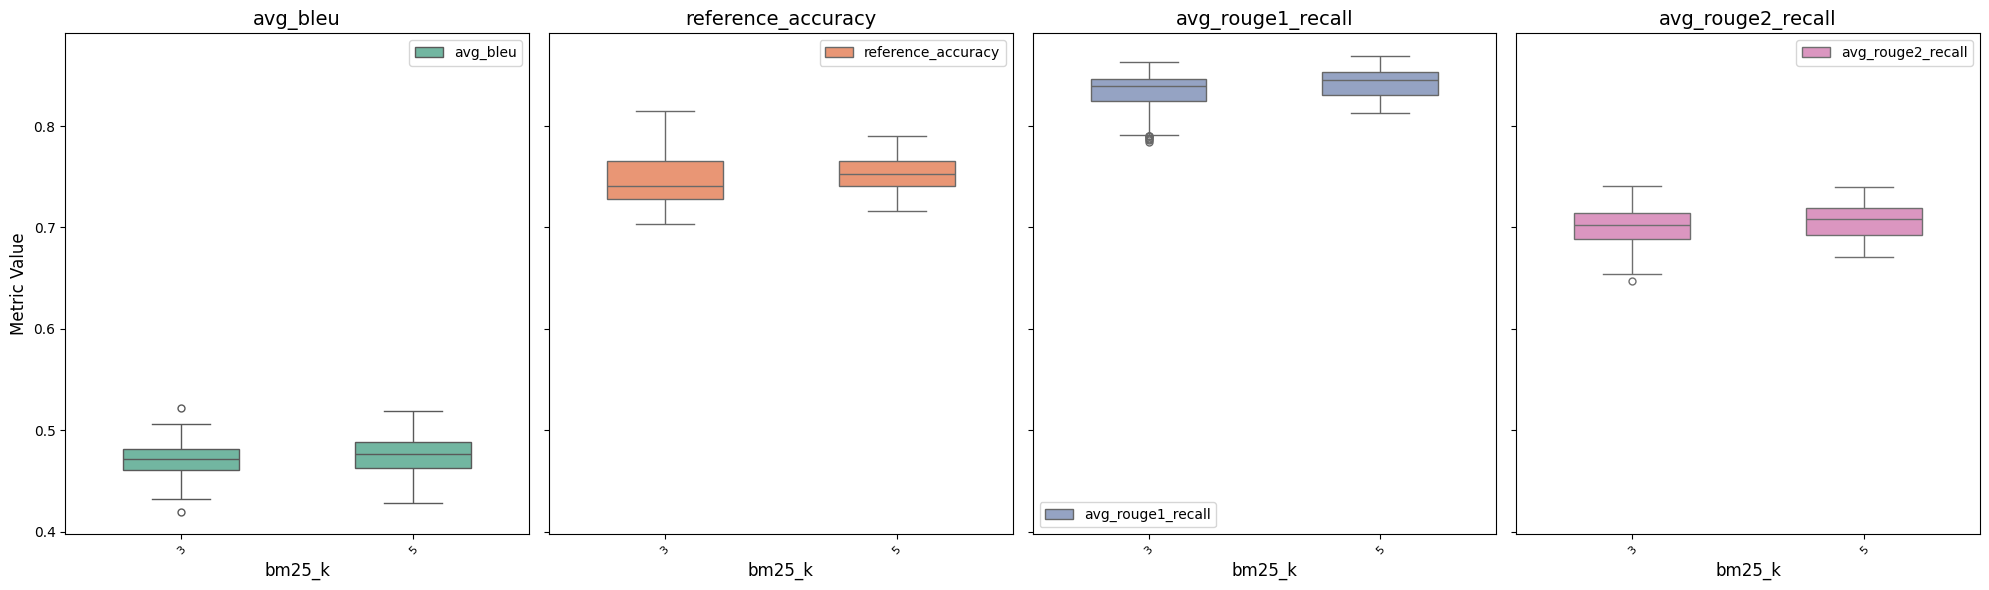

c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


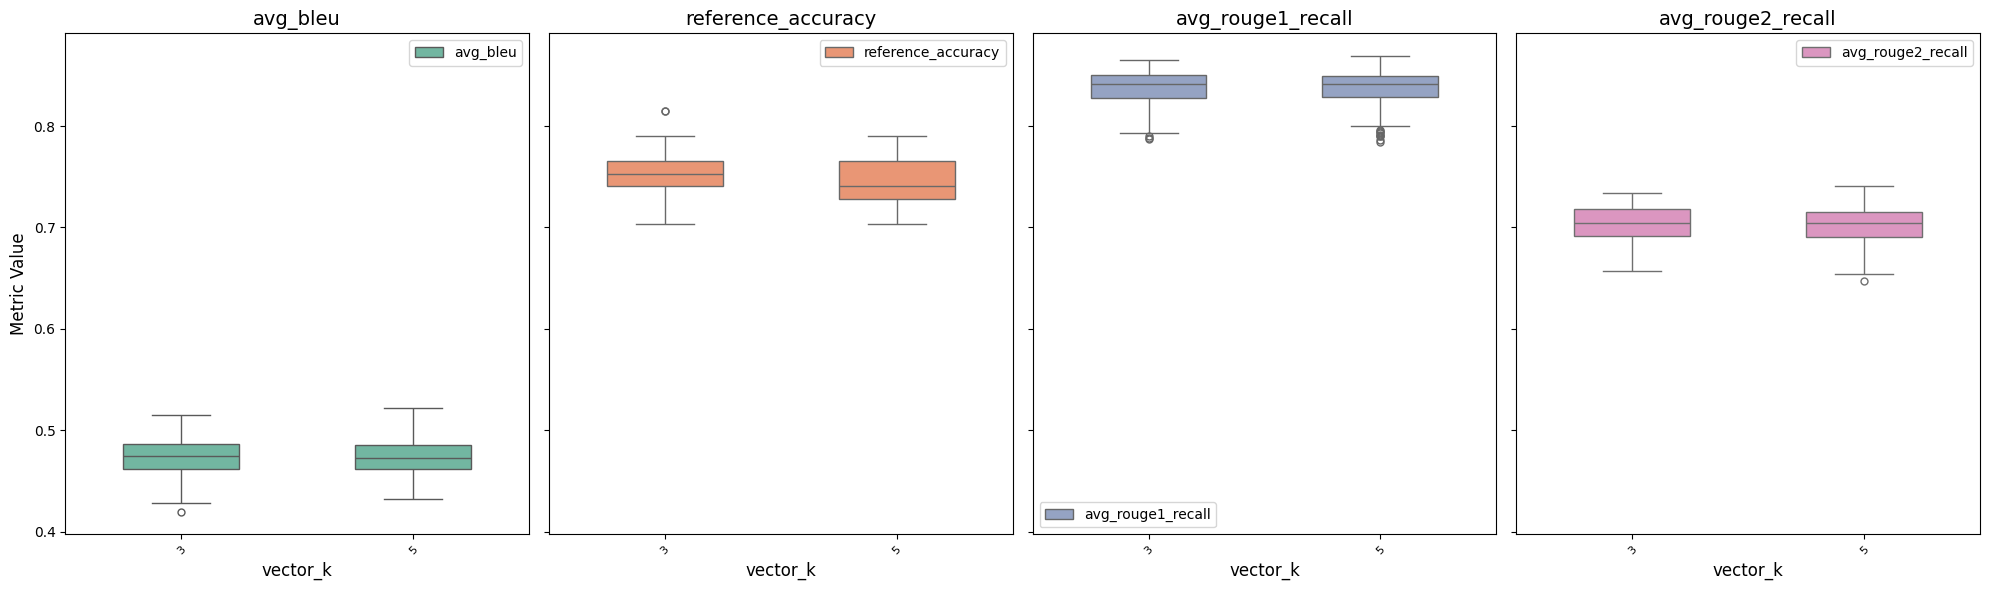

c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


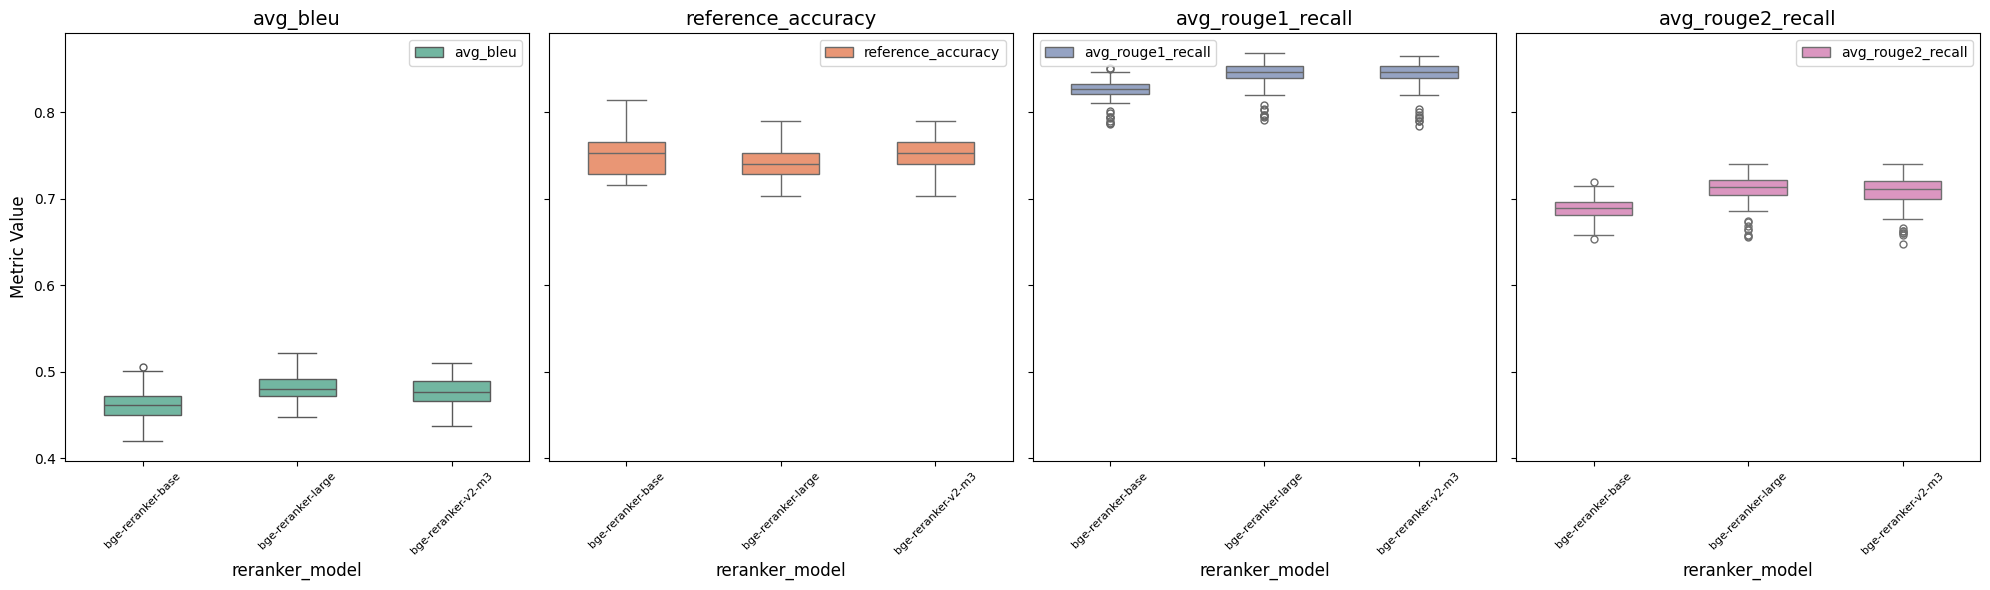

参数'reranker_top_n'只有一个唯一值，跳过绘制。


c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


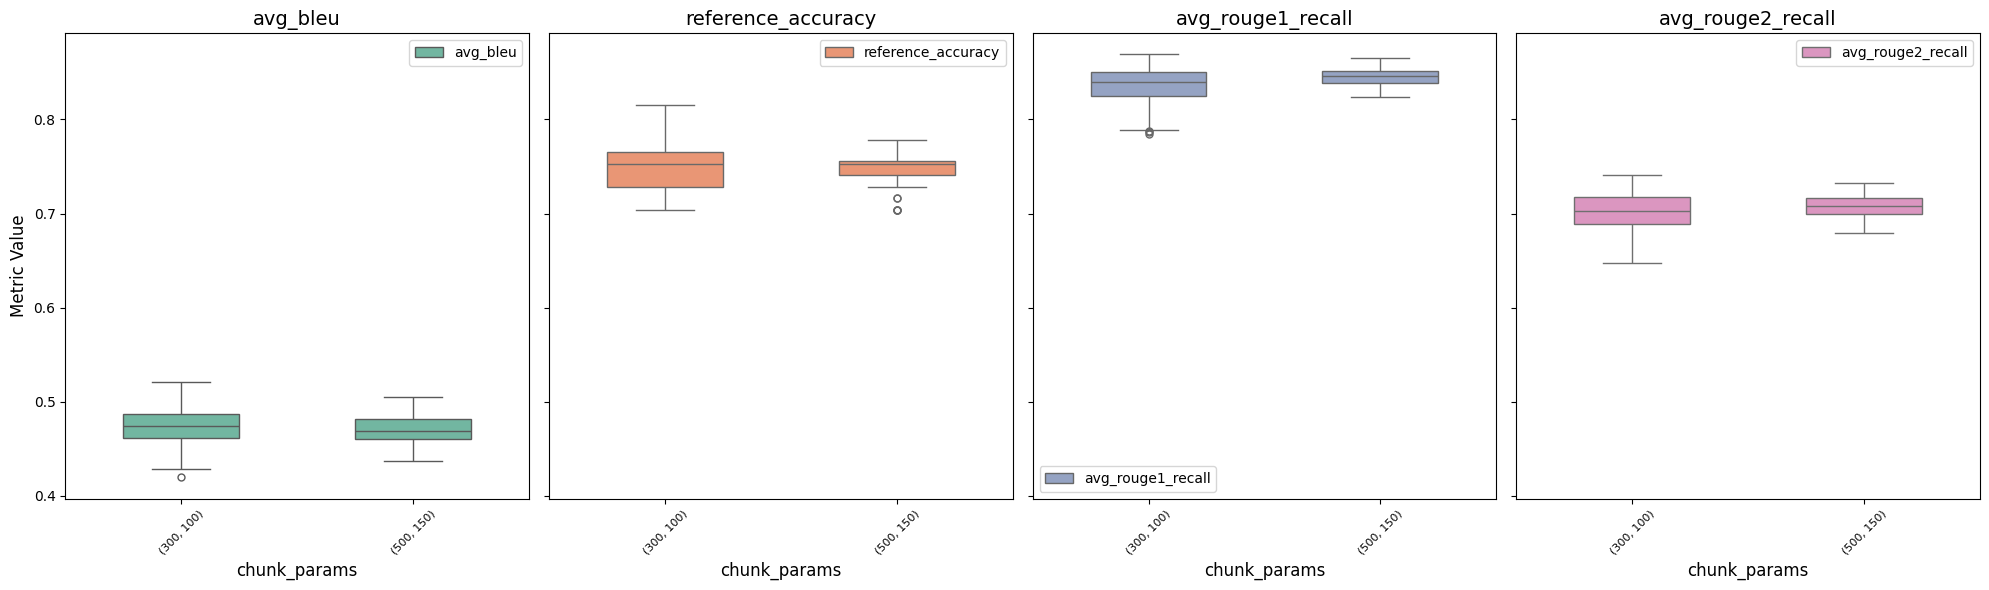

c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


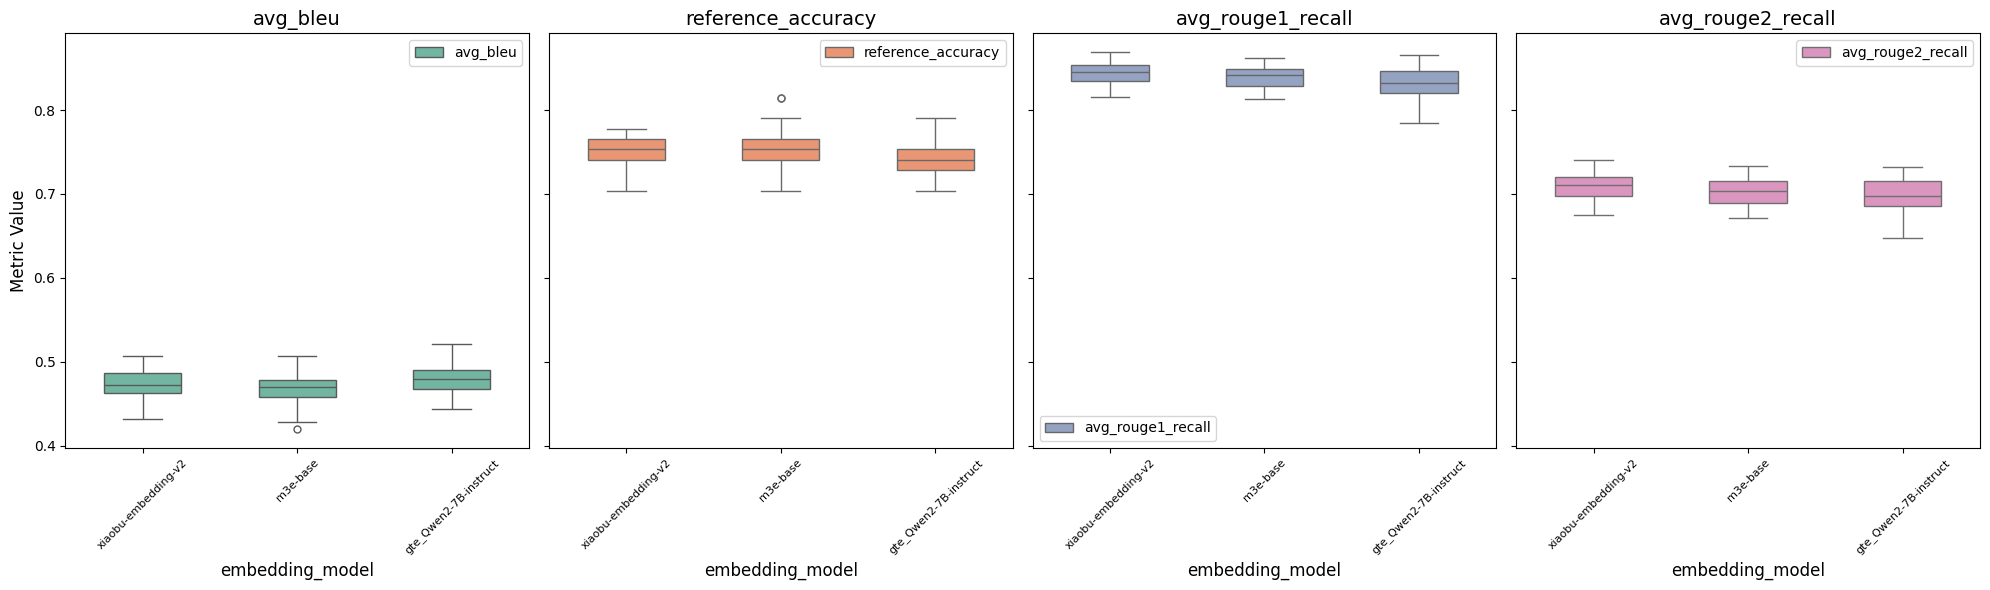

c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\何嘉凯\Desktop\python\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


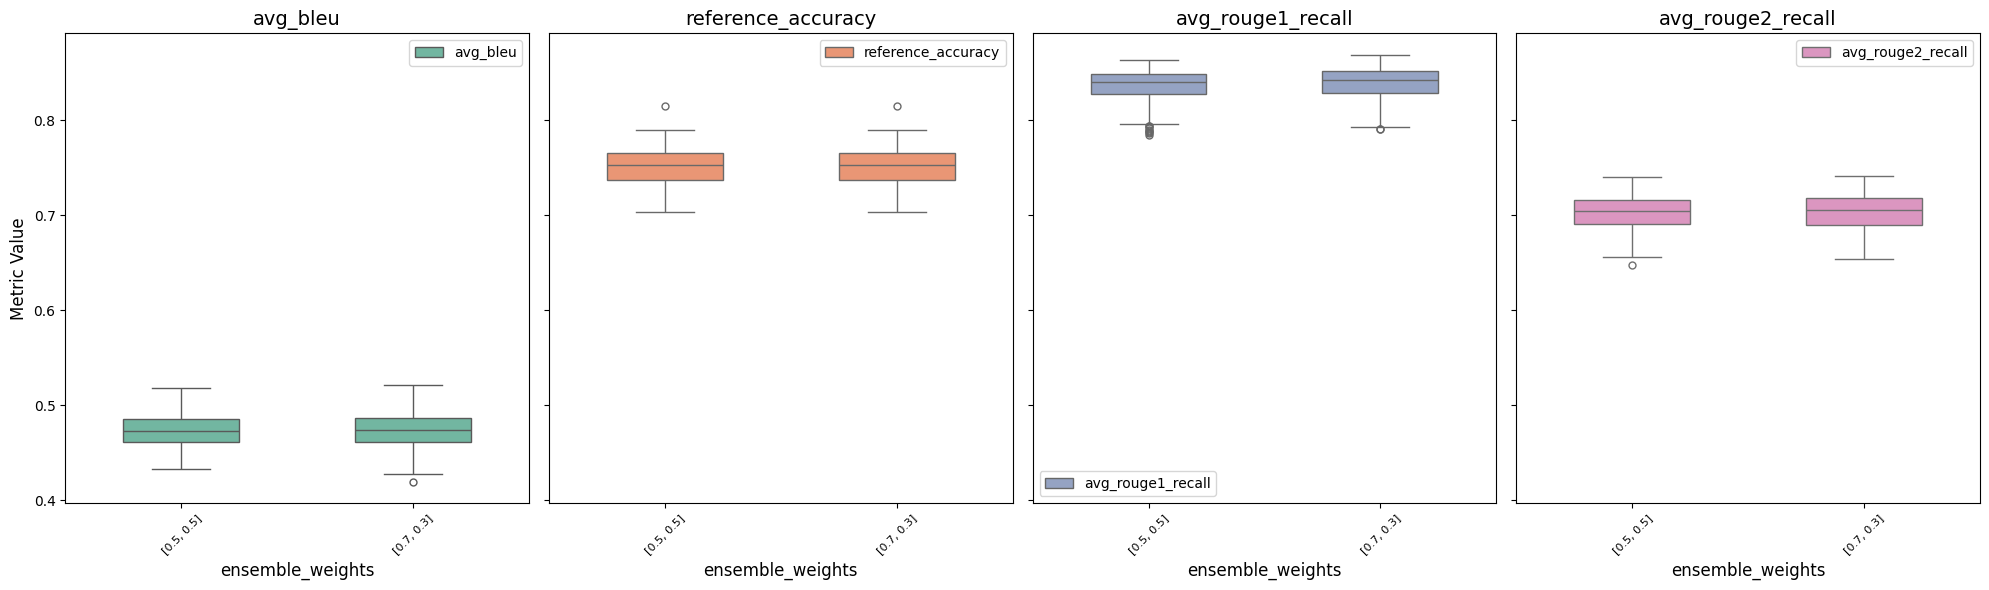

In [16]:
# 设置一个更具美学的调色板
palette = sns.color_palette("Set2", len(metrics))  # "Set2" 是一个对色盲友好的调色板

# 设置 matplotlib 图形的大小
plt.figure(figsize=(18, 12))

# 遍历每个参数
for param in parameters:
    if data[param].nunique() > 1:  # 仅在参数有变化时绘制
        # 创建子图（每行一个子图，列数与 metrics 的数量相同）
        fig, axes = plt.subplots(1, len(metrics), figsize=(20, 6), sharey=True)

        for i, metric in enumerate(metrics):
            # 根据每个 metric 创建绘图
            if pd.api.types.is_numeric_dtype(data[param]) and data[param].nunique() > 5:
                # 对于具有多个唯一值的数值型参数，使用散点图
                scatter_plot = sns.scatterplot(data=data, x=param, y=metric, ax=axes[i], color=palette[i], s=100)
                scatter_plot.legend(labels=[metric])  # 手动添加散点图的图例
            else:
                # 对于类别型或具有少量唯一值的数值型参数，使用箱线图
                box_plot = sns.boxplot(data=data, x=param, y=metric, ax=axes[i], color=palette[i], width=0.5, fliersize=5)
                box_plot.legend(labels=[metric])  # 手动添加箱线图的图例

                # 获取箱线图的中位数（即箱体中的中间线位置）
                for j, artist in enumerate(box_plot.artists):
                    # 获取每个箱线图的中位数位置
                    median_value = artist.get_paths()[0].vertices[1][0]  # 获取箱体中间那条线的位置（即中位数）
                    # 在图中添加中位数文本
                    axes[i].text(j, median_value, f'{median_value:.2f}', color='black', ha='center', va='center', fontsize=10)

            # 为每个子图添加标题和标签
            axes[i].set_title(f'{metric}', fontsize=14)
            axes[i].set_xlabel(param, fontsize=12)
            axes[i].set_ylabel('Metric Value', fontsize=12)

            # 调整 x 轴的刻度参数（旋转并减少字体大小）
            axes[i].tick_params(axis='x', rotation=45, labelsize=8)  # 为了更好的清晰度，缩小字体

        plt.tight_layout()

        # 保存图形为 PDF 格式
        plt.savefig(f'plot_{param}.pdf', format='pdf', dpi=300)

        # 显示图形
        plt.show()

    else:
        print(f"参数'{param}'只有一个唯一值，跳过绘制。")


In [14]:
# Group by the parameters of interest and calculate the mean of the metrics
grouped_data = data.groupby(parameters)[metrics].mean().reset_index()

# Sort the grouped data by 'avg_bleu' in descending order
grouped_data_sorted = grouped_data.sort_values(by='avg_bleu', ascending=False)

# Print the sorted data
print(grouped_data_sorted)

# Save the grouped data to a CSV file
grouped_data_sorted.to_csv('average_performance.csv', index=False)

print("\nData has been saved to 'average_performance.csv'.")


     bm25_k  vector_k      reranker_model  reranker_top_n chunk_params  \
7         3         3   bge-reranker-base               3   (500, 150)   
139       5         5  bge-reranker-v2-m3               3   (500, 150)   
30        3         3  bge-reranker-v2-m3               3   (500, 150)   
120       5         5  bge-reranker-large               3   (300, 100)   
42        3         5   bge-reranker-base               3   (500, 150)   
..      ...       ...                 ...             ...          ...   
70        3         5  bge-reranker-v2-m3               3   (500, 150)   
119       5         5   bge-reranker-base               3   (500, 150)   
3         3         3   bge-reranker-base               3   (300, 100)   
143       5         5  bge-reranker-v2-m3               3   (500, 150)   
142       5         5  bge-reranker-v2-m3               3   (500, 150)   

           embedding_model ensemble_weights  avg_bleu  reference_accuracy  \
7    gte_Qwen2-7B-instruct       [

In [15]:
# 设置 Pandas 显示选项
pd.set_option('display.max_rows', None)        # 显示所有行
pd.set_option('display.max_columns', None)     # 显示所有列
pd.set_option('display.width', None)           # 自动调整显示宽度，以便显示所有列
pd.set_option('display.max_colwidth', None)    # 显示所有列的完整内容 (针对字符串类型列)

# 计算每个数据点的指定指标之和
data['sum_of_metrics'] = data[metrics].sum(axis=1)

# 找到 'sum_of_metrics' 列中值最大的行
highest_sum_data = data.loc[data['sum_of_metrics'].idxmax()]

# 打印结果
print("Sum of metrics for each data point:")
print(data[['run_id', 'timestamp', 'sum_of_metrics']])
print("\nData with the highest sum of specified metrics:")
print(highest_sum_data)

Sum of metrics for each data point:
              run_id        timestamp  sum_of_metrics
2    20250605_184517  20250605_184517          2.7323
3    20250605_185258  20250605_185258          2.7827
4    20250605_190031  20250605_190031          2.7109
5    20250605_190810  20250605_190810          2.7837
6    20250605_191547  20250605_191547          2.7419
7    20250605_192324  20250605_192324          2.7874
8    20250605_193101  20250605_193101          2.7431
9    20250605_193838  20250605_193838          2.7641
10   20250605_194619  20250605_194619          2.6643
11   20250605_195357  20250605_195357          2.7191
12   20250605_200137  20250605_200137          2.7121
13   20250605_200918  20250605_200918          2.7126
14   20250605_201703  20250605_201703          2.6633
15   20250605_202444  20250605_202444          2.6721
16   20250605_203231  20250605_203231          2.7499
17   20250605_204018  20250605_204018          2.7207
18   20250605_204802  20250605_204802         